In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [3]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [5]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [6]:
inflation = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month', inplace = True)
inflation.sort_values(by = ['month'],axis=0, ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2023-03-31,0.7
2023-04-30,0.1
2023-05-31,0.2


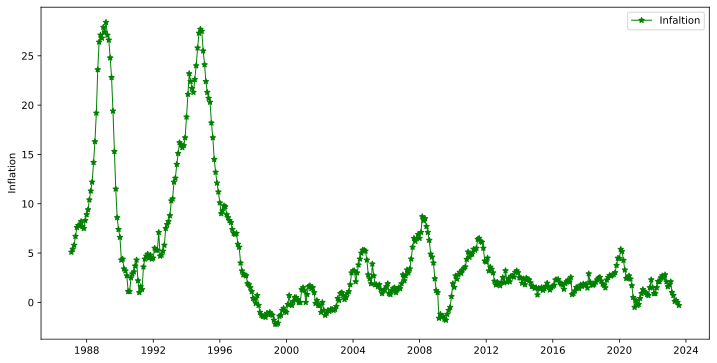

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(inflation['cpi'], label='Infaltion', color='green', linewidth=1, linestyle='-', marker='*')
ax.set_ylabel('Inflation')
ax.legend(loc='upper right')
plt.show();

In [8]:
reg_data = pd.merge(Month_data, inflation, left_index=True, right_index=True)
reg_data = reg_data['2000':]
reg_data

,Raw_return,cpi
2000-01-31,0.123242,-0.2
2000-02-29,0.116990,0.7
2000-03-31,0.049948,-0.2
2000-04-30,0.020053,-0.3
2000-05-31,0.031710,0.1
...,...,...
2023-03-31,-0.002057,0.7
2023-04-30,0.015404,0.1
2023-05-31,-0.035721,0.2
2023-06-30,-0.000781,0.0


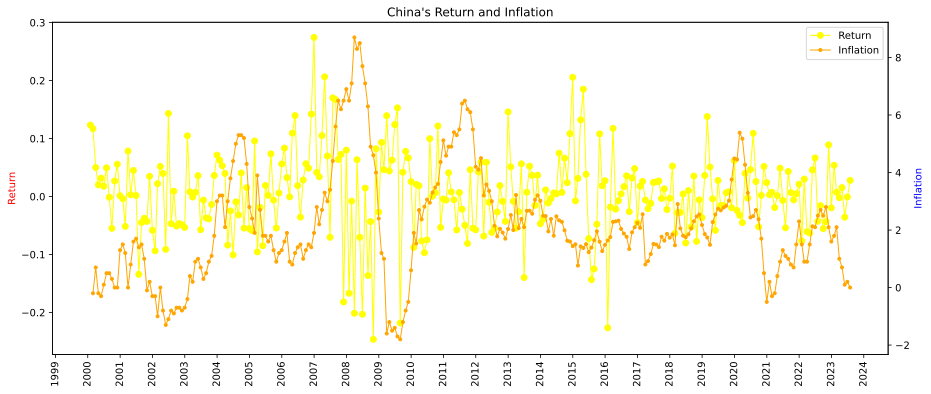

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(reg_data['Raw_return'], 
         label='Return', 
         color='yellow', 
         linewidth=1, 
         linestyle='-', 
         marker='o')
ax1.set_ylabel('Return',color='red')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(reg_data['cpi'].shift(1), 
         label='Inflation', 
         color='orange', 
         linewidth=1, 
         linestyle='-', 
         marker='.')
ax2.set_ylabel('Inflation',color='blue')

plt.title("China's Return and Inflation")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

In [10]:
reg_data['cpi'].describe().round(3)

count    283.000
mean       2.135
std        1.919
min       -1.800
25%        1.000
50%        1.868
75%        2.829
max        8.700
Name: cpi, dtype: float64

In [11]:
reg_data.skew().round(3)
reg_data.kurt().round(3)

Raw_return   -0.098
cpi           0.813
dtype: float64

Raw_return    1.840
cpi           1.044
dtype: float64

In [12]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
model_cpi = smf.ols('Raw_return ~ lcpi', data=reg_data).fit()
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     11.56
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           0.000774
Time:                        17:39:01   Log-Likelihood:                 350.81
No. Observations:                 281   AIC:                            -697.6
Df Residuals:                     279   BIC:                            -690.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0208      0.006      3.318      0.0

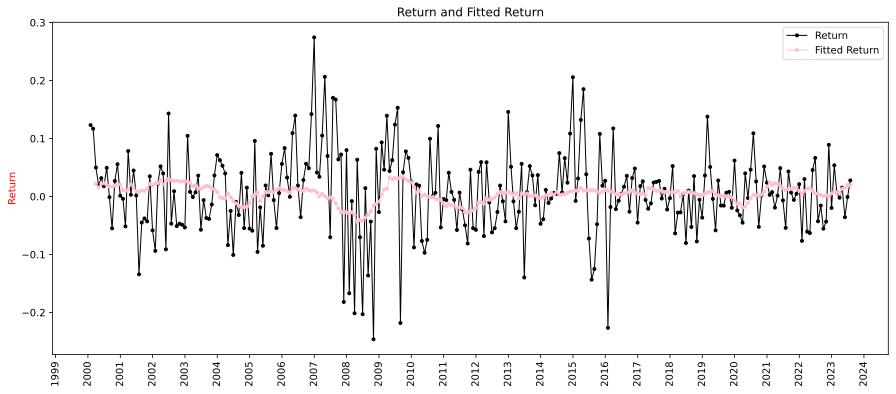

In [29]:
data_fit = reg_data.copy()
data_fit['fitted_return'] = model_cpi.fittedvalues

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.plot(data_fit['Raw_return'],
            label='Return',
            color='black',
            linewidth=1,
            linestyle='-',
            marker='.')
ax1.plot(data_fit['fitted_return'],
            label='Fitted Return',
            color='pink',
            linewidth=1,
            linestyle='-',
            marker='.')

ax1.set_ylabel('Return', color='red')
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=90)
plt.title('Return and Fitted Return')
plt.legend(loc='upper right')
plt.show();

In [15]:
Q_reg_data = reg_data.resample('Q').apply({
    'Raw_return': lambda x: (1+x).prod() - 1,
    'cpi': lambda x: sum(x)
})
Q_reg_data

,Raw_return,cpi
2000-03-31,0.317318,0.3
2000-06-30,0.071041,0.3
2000-09-30,-0.009310,0.8
2000-12-31,0.085501,2.8
2001-03-31,0.018954,2.0
...,...,...
2022-09-30,-0.110111,8.0
2022-12-31,0.021448,5.5
2023-03-31,0.059432,3.8
2023-06-30,-0.021632,0.3


In [16]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(2)/100
model_cpi_q = smf.ols('Raw_return ~ lcpi', data=Q_reg_data).fit()
print(model_cpi_q.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.030
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0851
Time:                        17:39:48   Log-Likelihood:                 50.564
No. Observations:                  93   AIC:                            -97.13
Df Residuals:                      91   BIC:                            -92.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0453      0.023      2.006      0.0

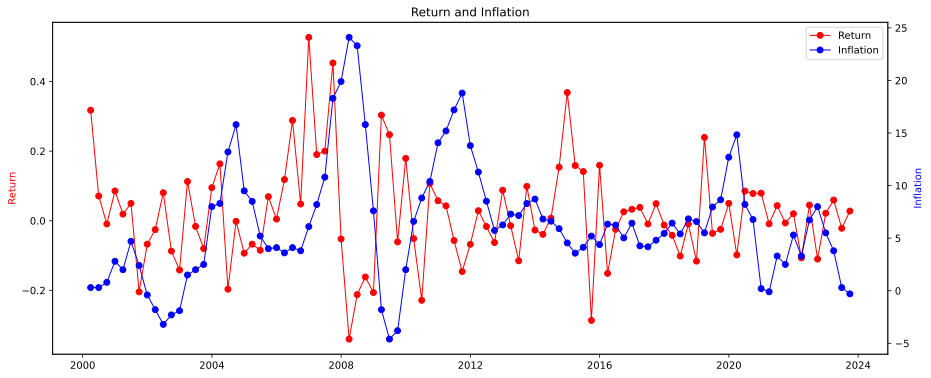

In [17]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,1,1)

ax1.plot(Q_reg_data['Raw_return'],
            label='Return',
            color='red',
            linewidth=1,
            linestyle='-',
            marker='o')
ax1.set_ylabel('Return', color='red')
ax2 = ax1.twinx()
ax2.plot(Q_reg_data['cpi'],
            label='Inflation',
            color='blue',
            linewidth=1,
            linestyle='-',
            marker='o')
ax2.set_ylabel('Inflation', color='blue')
plt.title('Return and Inflation')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show();